In [1]:
from ifrappy.granule_proteins import generate_rna_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from ifrappy.plot_library import swarmy_boxes, bar_graphs, perform_statistical_test, overlay_recovery_curves

100%|██████████| 6/6 [04:27<00:00, 44.51s/it]


<Figure size 432x288 with 0 Axes>

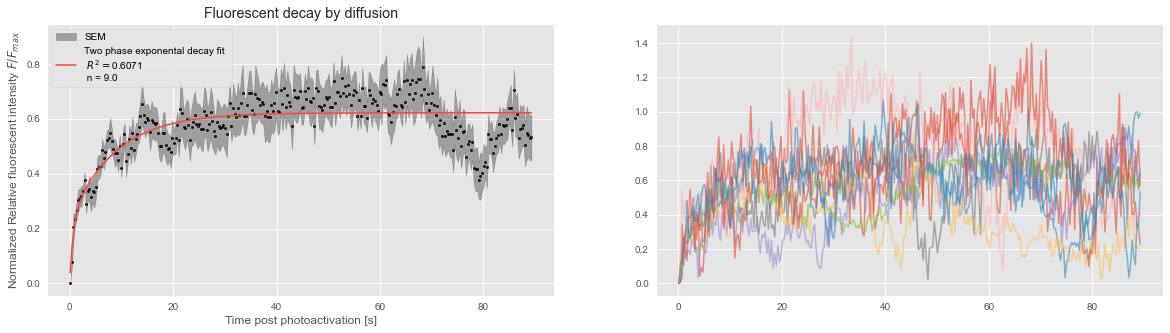

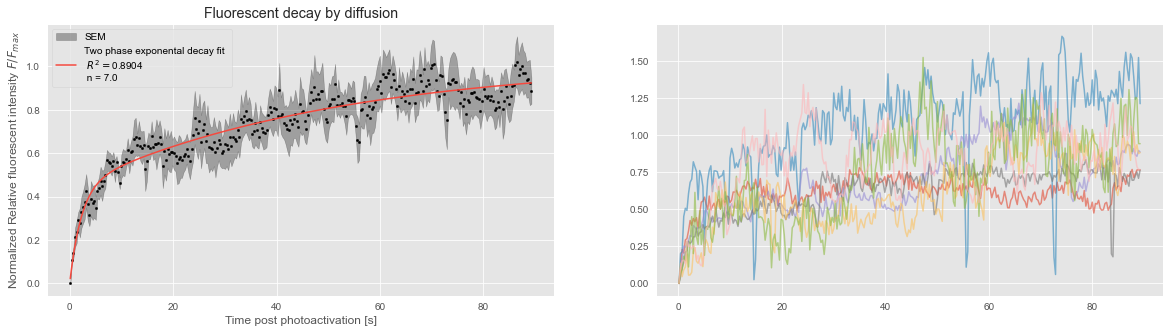

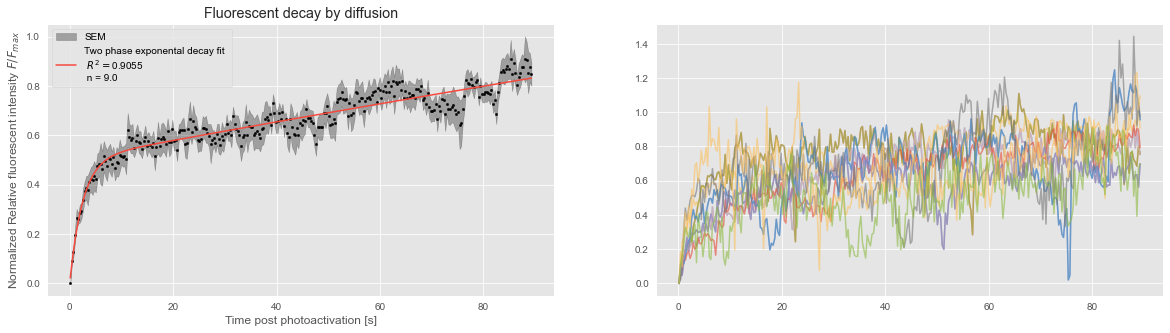

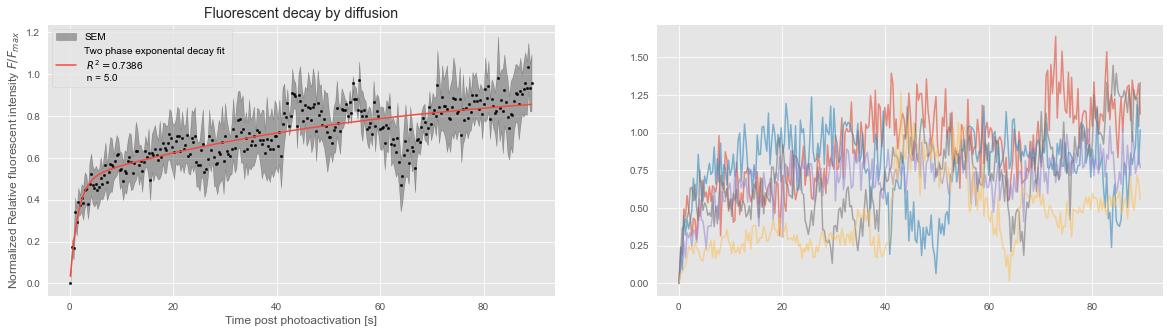

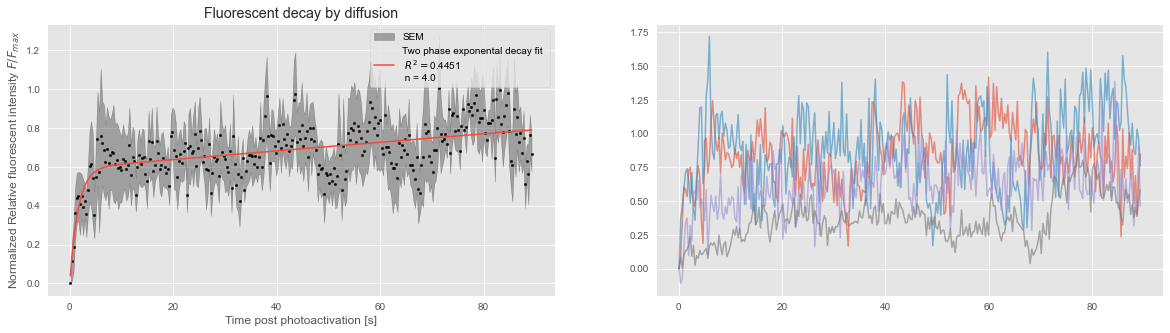

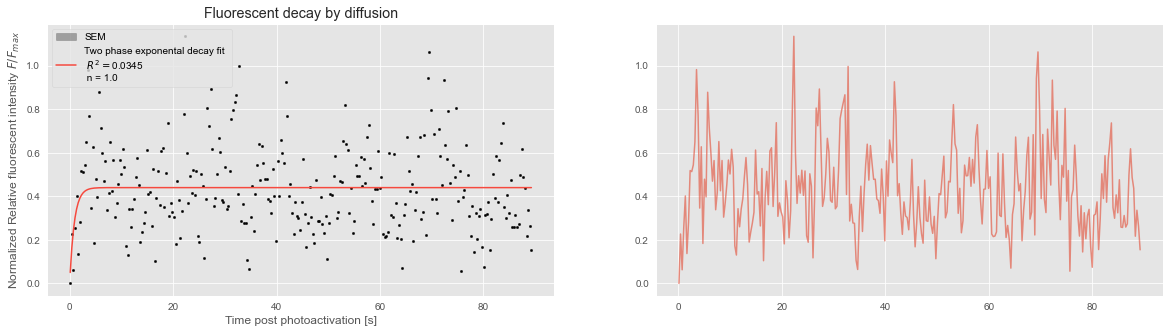

In [2]:
exp_file = generate_rna_data(generate_freshly=True)

In [3]:
# # selt = ["Nanos3'UTR 400pg",  "Globin3'UTR 400pg", "Tdrd7a3'UTR 400pg"]
# data_dict = {}
# for k,v in exp_file.per_experiment_values('tau slow').items():
#     if k in selt:
#         data_dict.update({k:v.to_list()})
# # perform_statistical_test(data_dict, True, True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


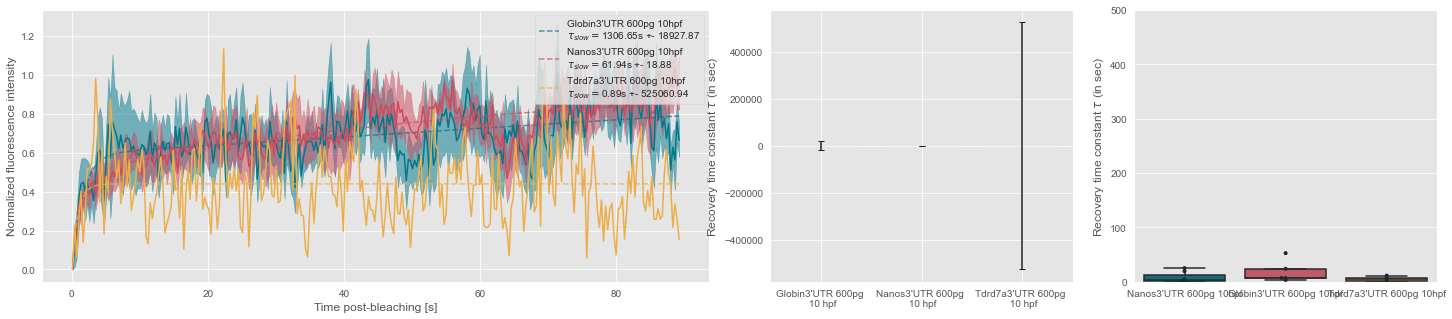

In [9]:
rna_amount = 600
selection = [ f"Globin3'UTR {rna_amount}pg 10hpf", f"Nanos3'UTR {rna_amount}pg 10hpf", f"Tdrd7a3'UTR {rna_amount}pg 10hpf"]
plt.style.use('ggplot')
clrs = ["#00798c", "#d1495b", "#edae49"] # full color palatte under https://coolors.co/palette/edae49-d1495b-00798c-30638e-003d5b
fig= plt.figure(figsize=(25,5)) #figsize=(20,5)
gs = fig.add_gridspec(1,4)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])
swarmy_boxes(ax3, exp_file.per_experiment_values('tau slow', triagery=selection), colors=clrs)
ax3.set_ylabel(r'Recovery time constant $\tau$ (in sec)')
ax3.set_ylim(0, 500)
bar_graphs(ax2,exp_file,selection , 'tau slow', color_palette=clrs)
overlay_recovery_curves(ax1, exp_file, selection, colors=clrs, protein_colors=False)
plt.savefig(f'/Volumes/HELHEIM/analyzed_data/diffusivity/202306_RNAinfluence/{rna_amount}pg/Graph.pdf')
plt.show()

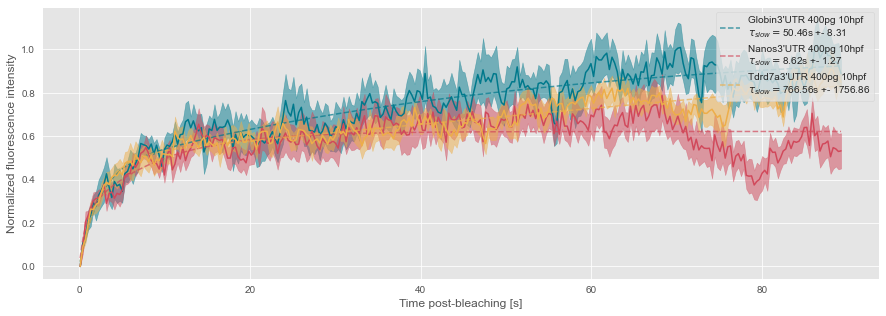

In [5]:
exp_file.plot_experiments(selection,protein_colors=False, color_palette=clrs, save_path='/Volumes/HELHEIM/analyzed_data/diffusivity/202306_RNAinfluence/400pg')